In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

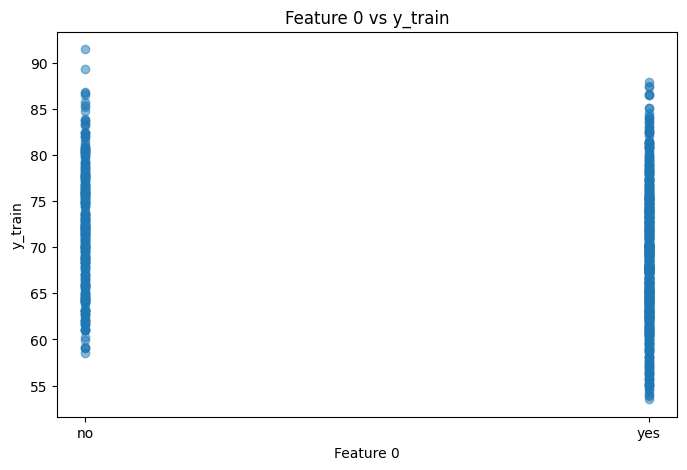

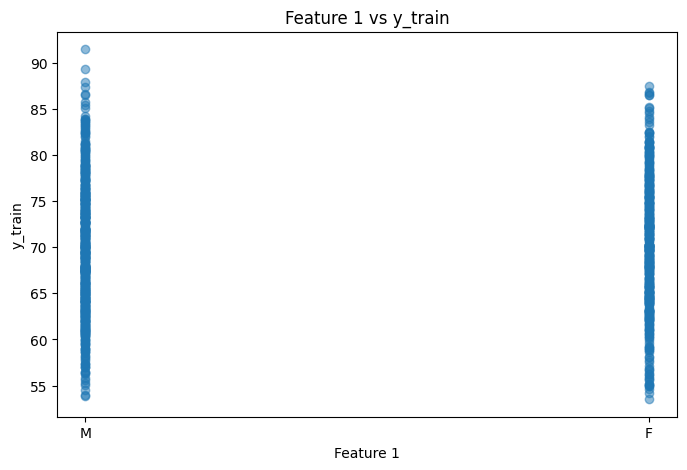

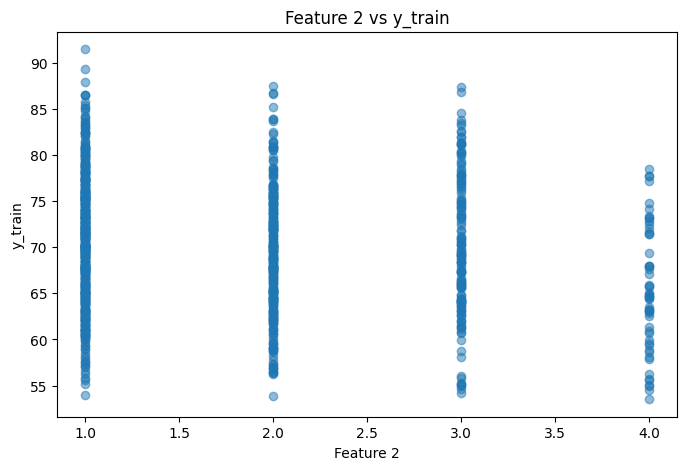

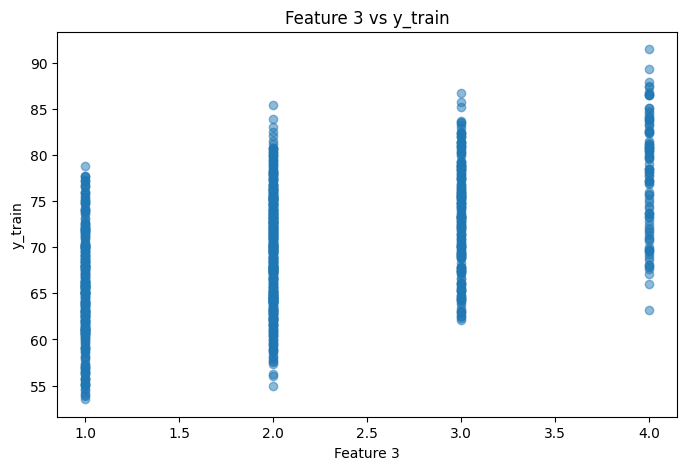

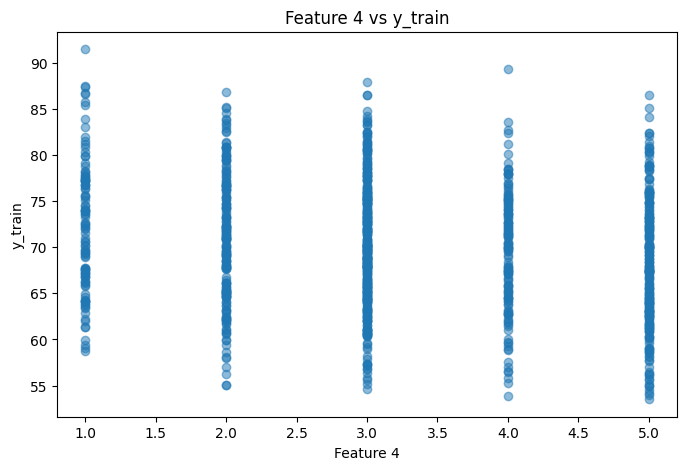

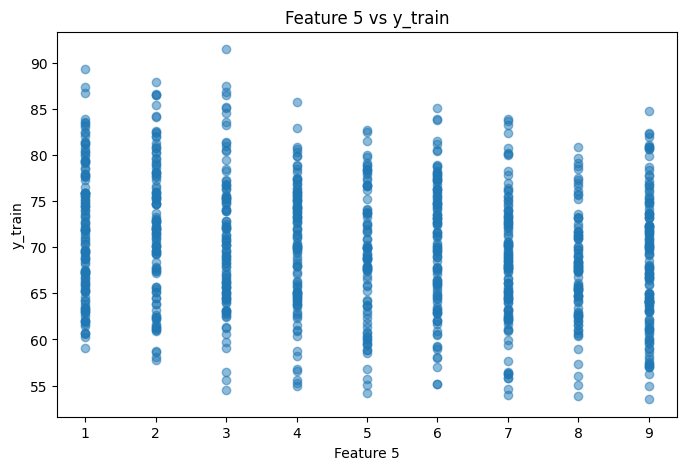

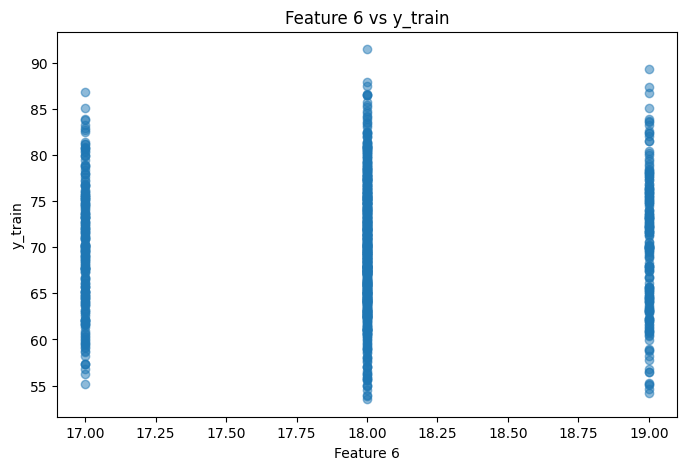

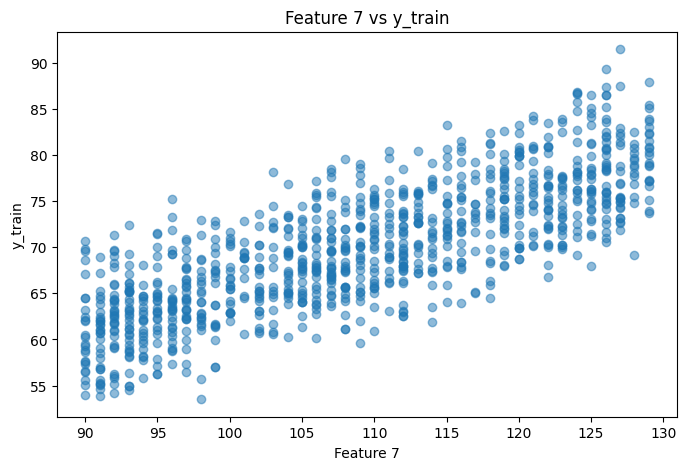

In [17]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

for i in range(x_train.shape[1]):
    plt.figure(figsize=(8, 5))
    plt.scatter(x_train[:, i], y_train, alpha=0.5)
    plt.title(f'Feature {i} vs y_train')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('y_train')
    plt.show()



In [18]:
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
   
    # Encoding for "sex": M -> 0, F -> 1
    gender_mapping = {'M': 0, 'F': 1}
    # Encoding for "internet": no -> 0, yes -> 1
    internet_mapping = {'no': 0, 'yes': 1}
    
    # Apply encoding
    for row in x_train:
        row[0] = internet_mapping.get(row[0], row[0])  
        row[1] = gender_mapping.get(row[1], row[1])  
    return x_train

x_train = feature_changing(x_train)

In [19]:

def z_score(x_train):
    x_train = np.array(x_train, dtype=np.float64)
    x_train_scaled = np.copy(x_train)
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_std[x_std == 0] = 1
    x_train_scaled = (x_train - x_mean) / x_std
    return x_train_scaled, x_std, x_mean



In [20]:
def cost(x_train,y_train,w,b):
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    error = predictions - y_train
    squared_error = np.square(error)
    loss = np.mean(squared_error)
    return loss

In [21]:
def gradient_descent(x_train, y_train, w, b, lr=0.01):
    m = len(x_train)
    y_pred = np.dot(x_train, w) + b
    dw = (-2/m) * np.dot(x_train.T, (y_train - y_pred))
    db = (-2/m) * np.sum(y_train - y_pred)
    w -= lr * dw
    b -= lr * db
    return w, b

In [22]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = float('inf')
i=0



while True:
    current_cost = cost(x_train, y_train, w, b)
    if abs(old_cost - current_cost) < 0.0000001:
        break
    old_cost = current_cost
    w, b = gradient_descent(x_train, y_train, w, b)
    i += 1
    print(f"Iteration {i}, Cost: {current_cost}")

# Load the test data and preprocess
x_predict = pd.read_excel('Test data.xlsx').iloc[:, :8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = z_score(x_predict)[0]
ans = pd.read_excel('Test data.xlsx').iloc[:, 8].to_numpy()

# Predict and calculate accuracy
y_predict = np.dot(x_predict, w) + b
y_predict = y_predict.flatten()
# print(y_predict[0:20],ans[0:20])

accuracy = sum(abs(y_predict - ans) < 0.5) / len(ans) * 100
ok = 'Congratulations' if accuracy > 95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")


Iteration 1, Cost: 4988.499927338437
Iteration 2, Cost: 4790.859759210477
Iteration 3, Cost: 4601.050236807713
Iteration 4, Cost: 4418.761091160197
Iteration 5, Cost: 4243.694347460008
Iteration 6, Cost: 4075.563837890866
Iteration 7, Cost: 3914.0947337634366
Iteration 8, Cost: 3759.023096191272
Iteration 9, Cost: 3610.095444572593
Iteration 10, Cost: 3467.0683421722724
Iteration 11, Cost: 3329.7079981263255
Iteration 12, Cost: 3197.7898852180847
Iteration 13, Cost: 3071.0983728010347
Iteration 14, Cost: 2949.4263742680273
Iteration 15, Cost: 2832.5750084904284
Iteration 16, Cost: 2720.353274673554
Iteration 17, Cost: 2612.5777400967245
Iteration 18, Cost: 2509.0722402273154
Iteration 19, Cost: 2409.667590718441
Iteration 20, Cost: 2314.2013108193223
Iteration 21, Cost: 2222.517357746066
Iteration 22, Cost: 2134.4658715785054
Iteration 23, Cost: 2049.9029302659555
Iteration 24, Cost: 1968.6903143412937
Iteration 25, Cost: 1890.6952809586166
Iteration 26, Cost: 1815.7903468850093
Iterat